<a href="https://colab.research.google.com/github/PrinceShamim022/Fisheries_DataAnalysis_Projects/blob/main/LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1 : import library
import pandas as pd

In [35]:
!git clone https://github.com/PrinceShamim022/Fisheries_DataAnalysis_Projects.git

Cloning into 'Fisheries_DataAnalysis_Projects'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 5.75 KiB | 5.75 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [36]:
# Step 2 : import data
df = pd.read_csv('/content/Fisheries_DataAnalysis_Projects/fish.csv')

In [37]:
df.head(5)

,Species,Category,Weight,Length,Diagonal,Height,Width
0,Tilapia,1,242.0,25.4,30.0,11.5200,4.0200
1,Tilapia,1,290.0,26.3,31.2,12.4800,4.3056
2,Tilapia,1,340.0,26.5,31.1,12.3778,4.6961
3,Tilapia,1,363.0,29.0,33.5,12.7300,4.4555
4,Tilapia,1,430.0,29.0,34.0,12.4440,5.1340


In [52]:
# Check for missing values in the dataset
df.isna().sum()
# df.isnull().sum()

Species     0
Category    0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

In [51]:
df = df.dropna()
print(df)

     Species  Category  Weight  Length  Diagonal   Height   Width
0    Tilapia         1   242.0    25.4      30.0  11.5200  4.0200
1    Tilapia         1   290.0    26.3      31.2  12.4800  4.3056
2    Tilapia         1   340.0    26.5      31.1  12.3778  4.6961
3    Tilapia         1   363.0    29.0      33.5  12.7300  4.4555
4    Tilapia         1   430.0    29.0      34.0  12.4440  5.1340
..       ...       ...     ...     ...       ...      ...     ...
154      Rui         7    12.2    12.2      13.4   2.0904  1.3936
155      Rui         7    13.4    12.4      13.5   2.4300  1.2690
156      Rui         7    12.2    13.0      13.8   2.2770  1.2558
157      Rui         7    19.7    14.3      15.2   2.8728  2.0672
158      Rui         7    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 7 columns]


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   160 non-null    object 
 1   Category  160 non-null    int64  
 2   Weight    159 non-null    float64
 3   Length    159 non-null    float64
 4   Diagonal  159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.9+ KB


In [39]:
df.describe()

,Category,Weight,Length,Diagonal,Height,Width
count,160.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.900000,398.326415,28.415723,31.227044,8.970994,4.417486
std,2.034915,357.978317,10.716328,11.610246,4.286208,1.685804
min,1.000000,0.000000,8.400000,8.800000,1.728400,1.047600
25%,2.000000,120.000000,21.000000,23.150000,5.944800,3.385650
50%,5.000000,273.000000,27.300000,29.400000,7.786000,4.248500
75%,5.000000,650.000000,35.500000,39.650000,12.365900,5.584500
max,7.000000,1650.000000,63.400000,68.000000,18.957000,8.142000


<ipython-input-73-d5fd855e4436>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


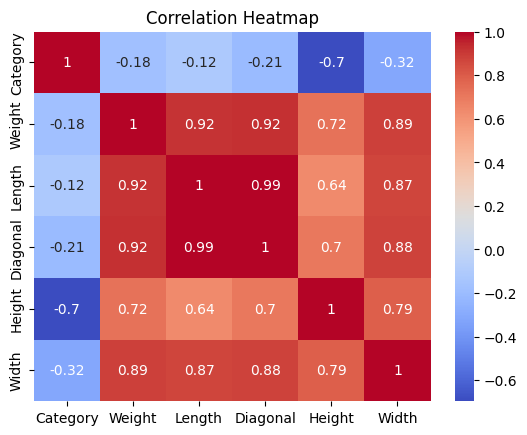

In [73]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlation matrix
import seaborn as sns
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Step 3 : define target (y) and features (X)

In [54]:
df.columns

Index(['Species', 'Category', 'Weight', 'Length', 'Diagonal', 'Height',
       'Width'],
      dtype='object')

In [55]:
y = df['Weight']

In [56]:
X = df[['Category','Length', 'Height', 'Width', 'Diagonal']]

In [57]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state = 2529)

In [58]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111, 5), (48, 5), (111,), (48,))

In [59]:
# Step 5 : select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [60]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

LinearRegression()

In [61]:
model.intercept_

-740.5985130150016

In [62]:
model.coef_

array([38.4546902 , -0.8134631 , 22.46296923, 36.71690781, 20.95199563])

In [68]:
# Step 7 : predict model
lm_predict = model.predict(X_test)

In [64]:
y_pred

array([ 508.86404234,  453.52423853,   98.44022662,  826.91530986,
        200.825135  ,  196.74371424,  291.4669754 ,  354.98176477,
        366.3838756 , -127.0320304 , -112.92783024,  435.62149257,
        196.88644129,  834.43188195,  582.5276422 ,  299.57667787,
        602.90325988,  111.02400523,  639.56382754,   98.04016494,
        139.69929481, -159.30426026,  607.53941307,  812.65807615,
        825.66877494, -150.02530651,  323.21298136,  747.15117017,
        368.59053549,  757.93519675,  533.01061237,  504.33666991,
        535.34035591,  749.0107403 , -156.00454826,  923.39067497,
        838.36651613,   -9.33096743,  202.9745949 ,  868.55318619,
        692.60335201,  951.67537626,  647.96488676,  710.66491792,
        583.6271322 ,  329.94347279,  538.89634118,  -24.14506059])

In [65]:
# Step 8 : model accuracy
from sklearn.metrics import mean_absolute_error, r2_score

In [66]:
mean_absolute_error(y_test,y_pred)

87.81412787205909

In [67]:
r2_score(y_test,y_pred)

0.8675244648378203

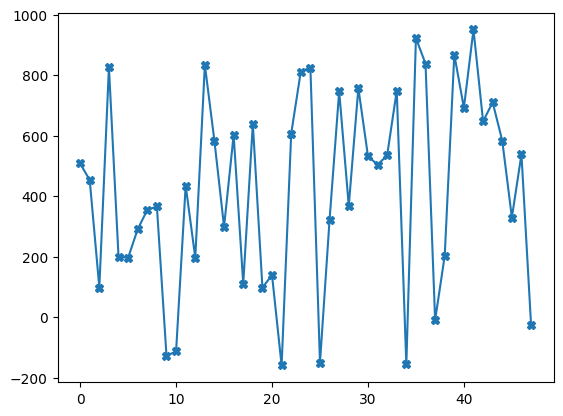

In [71]:
import matplotlib.pyplot as plt
plt.plot(lm_predict, marker='X')
plt.show()